In [24]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [35]:
### create flow domain 
# there are same number of Lagrangian and Eulerian grid points (Nx, Ny)
Lx, Ly = (2, 1)
Nx, Ny = (141, 71)
x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)
X, Y = np.meshgrid(x,y)
dx = Lx/(Nx-1)
dy = dx

t0 = 0
tf = 0.3
St = 1
R = 0
omega = np.pi
W = 5

### open and load flow map datasets
# file_path = f'inertial_flow_map_w{omega/np.pi}_{tf}_St{St}_R{R}.npy'
file_path = f'inertialGravW{W}_flow_map_w{omega/np.pi}_{tf}_St{St}_R{R}.npy'
if os.path.exists(file_path):
    flow_map = np.load(file_path, allow_pickle=True)
else:
    raise FileNotFoundError(f"The file '{file_path}' does not exist.")



In [36]:
Xf = flow_map[:,2]
Yf = flow_map[:,3]

# Xf_on_grid = [np.min(abs())]
# Xf_on_grid = np.asarray([x[np.argmin(abs(Xf[i] - x))] for i in range(len(Xf))], dtype=float)
# Yf_on_grid = np.asarray([y[np.argmin(abs(Yf[i] - x))] for i in range(len(Yf))], dtype=float)

# note that these two arrays store the INDEX of x, y coordinates
Xf_on_grid = np.asarray([np.argmin(abs(Xf[i] - x)) for i in range(len(Xf))], dtype=int)
Yf_on_grid = np.asarray([np.argmin(abs(Yf[i] - y)) for i in range(len(Yf))], dtype=int)
XYf_on_grid = np.column_stack((Xf_on_grid, Yf_on_grid))


In [37]:
# build a table (dict) to store counts of each point --> concentration on each grid
grid_points = np.column_stack((X.ravel(), Y.ravel()))

concentration = {}

for row in XYf_on_grid:
    row = tuple(row)
    if row in concentration:
        concentration[row] += 1
    else:
        concentration[row] = 1

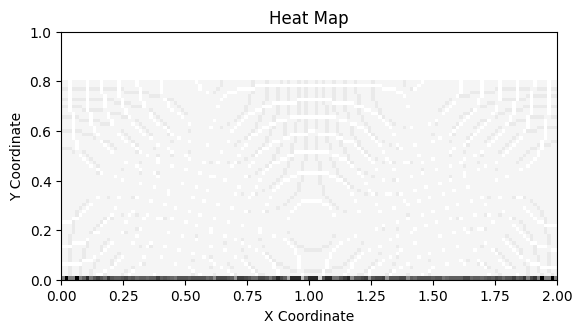

In [38]:
# visualise concentration over the grid
heat_map = np.zeros((Ny, Nx))

coordinates, intensities = zip(*concentration.items())
x_con, y_con = zip(*coordinates)

# Fill the heat_map array with the intensities based on the coordinates
for i in range(len(coordinates)):
    heat_map[y_con[i], x_con[i]] = intensities[i]

heat_map /= np.sum(heat_map>0)
# heat_map = heat_map/(Nx*Ny)
# heat_map = heat_map > 0.5
# Create a heat map plot

# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('gist_yarg')
  
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()
plt.imshow(heat_map, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap=orig_map , interpolation='nearest')
# plt.colorbar()
plt.title('Heat Map')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [34]:
np.min(Yf)

1.7690701519708336